# Data analysis with R

## Statistical modelling with R

### Summary statistics

R has a selection of functions for summary statistics: `summary`, `mean`, `median`, `quantile`, `sd`, `var`: 

# Exercise 3.1

**Question 1**

Use the `summary` function to summarize the `iris` dataset. Then calculate the `mean`, `median`, `sd`, and `var` of the `Sepal.Length` of the iris dataset.

Use the `quantile` function to calculate the inter-quartile range $Q_3 - Q_1$ of all the numeric columns - use the `probs` parameter to specify the probabilities.

Try repeating the calculation using the `apply` function. Hint: use the `IQR` function.

## Statistical distributions in R



Searching `?Distributions` in R returns a list of standard distributions available. There are four main functions for distributions in R:

* The **`d`**-type functions return the density at a specific value of the distribution
* The **`p`**-type functions return the probability at a specific value of the distribution
* The **`q`**-type functions return the quantile at a specific probability of the distribution
* The **`r`**-type functions are for random number generation

The table showing the posifix for the `d`, `p`, `q`, and `r` functions are given below:

|Postfix   | Distribution                    |
|----------|---------------------------------|
|`beta`    | Beta distribution               |
|`binom`   | Binomial distribution           |
|`cauchy`  | Cauchy distribution             |
|`chisq`   | Chi-Squared distribution        |
|`exp`     | Exponential distribution        |
|`f`       | F distribution                  |
|`gamma`   | Gamma distribution              |
|`geom`    | Geometric distribution          |
|`hyper`   | Hypergeometric distribution     |
|`lnorm`   | Log-normal distribution         |
|`multinom`| Multinomial distribution        |
|`nbinom`  | Negative binomial distribution  |
|`norm`   | Normal distribution             |
|`pois`    | Poisson distribution            |
|`t`       | Student's t distribution        |
|`unif`    | Uniform distribution            |
|`weibull` | Weibull distribution            |


The Normal Distribution is defined by two parameters:

* The mean $\mu$
* The standard deviation $\sigma$

R's functions for the Normal Distribution are `dnorm, pnorm, qnorm,` and `rnorm`.

In [1]:
# Sequence of quantiles
qx <- seq(-4, 4, length = 200)
# The corresponding densities
dx <- dnorm(qx, mean = 0, sd = 1)

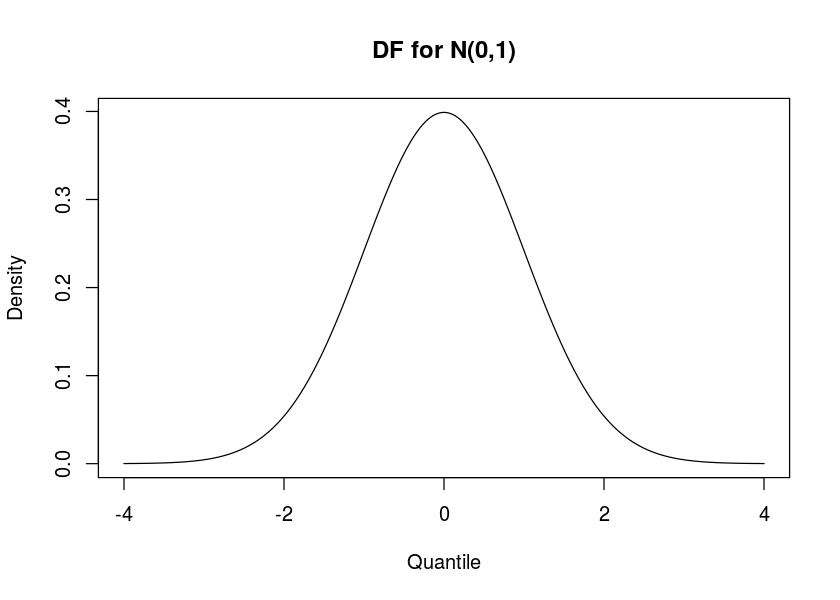

In [2]:
options(repr.plot.width = 7, repr.plot.height = 5)
plot(dx ~ qx, t = "l", xlab = "Quantile", ylab = "Density", main = "DF for N(0,1)")

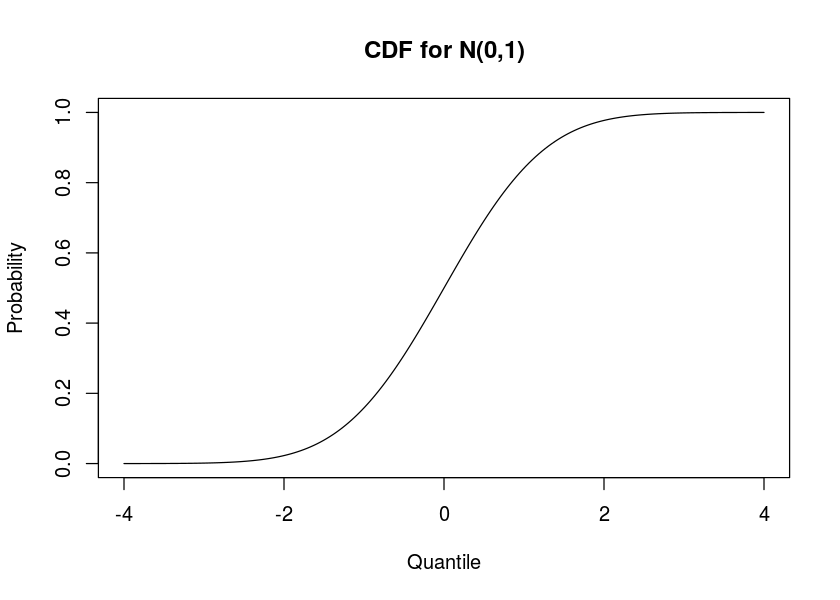

In [3]:
# The corresponding probabilities
px <- pnorm(qx, mean = 0, sd = 1)
plot(px ~ qx, t = "l", xlab = "Quantile", ylab = "Probability", main = "CDF for N(0,1)")

In [4]:
# Compare qnorm calculation with original quantiles
print(sum((qnorm(px, mean = 0, sd = 1) - qx)^2))

[1] 1.924252e-25


In [5]:
# Sample numbers from the Normal Distribution
rX <- rnorm(1000, mean = 0, sd = 1)

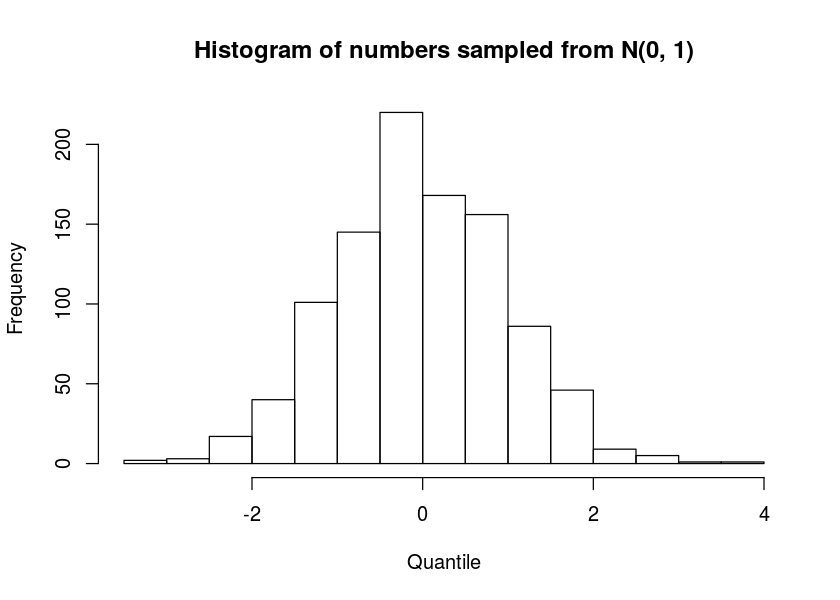

In [6]:
# Histogram of sampled numbers
hist(rX, main = "Histogram of numbers sampled from N(0, 1)", xlab = "Quantile")

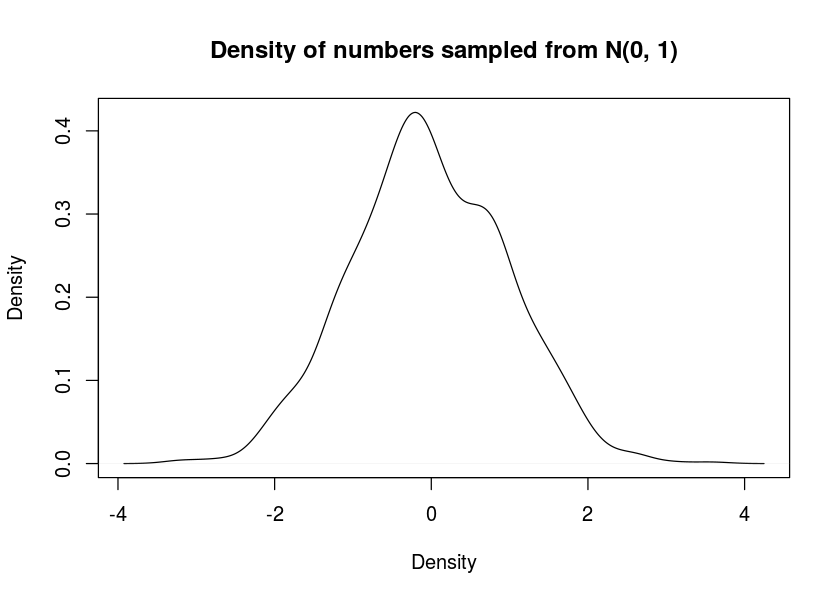

In [7]:
# Density plot of sampled numbers
plot(density(rX), xlab = "Density", main = "Density of numbers sampled from N(0, 1)")

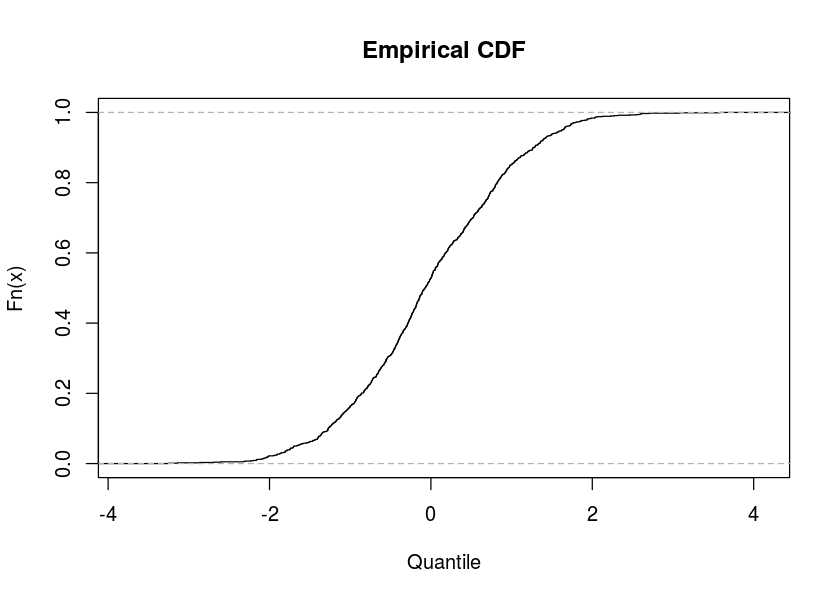

In [8]:
# Empirical CDF of numbers generated from Normal Distribution
plot(ecdf(rX), main = "Empirical CDF", xlab = "Quantile")

# Exercise 3.2

**Question 1**

Search `dgamma` in R's help what is the relationship between `scale` and `rate`? Create a variable `qgX` - a sequence of `200` numbers between `0` and `20` using the `seq` function and then use these quantiles to calculate the densities and probabilities `dgX` and `pgX` from `Gamma(shape = 7.5, scale = 1)`. Now plot them using base `graphics`. Calculate the quantiles from probabilities and make sure that they are equal to `qgX` within margin of numeric error.

Sample `10000` numbers from this dostribution and plot the historgram, the density and the empirical CDF. Repeat the `hist` plot with parameter `probability = TRUE`.

**Question 2**

Repeat the exercise in **Question 1** for the `LogNormal(meanlog = 2.5, sdlog = 0.4)` distribution. Use `200` numbers in the range [0, 60] for the quantiles.

**Question 3**

Repeat the exercise in **Question 1** for the `Poisson(lambda = 5)` distribution. Use whole numbers in the range `[0, 20]` for the quantiles. From the nature of random variable what way is the Poisson distribution different from the other two distributions we have seen?

**Question 4**

Repeat the Exercise in **Question 1** for the `Binomial(size = 40, prob = 0.1)` distribution. Use whole numbers in the range `[0, 20]`.

**Question 5**

Write `set.seed(0)` into your console then generate `100` numbers from the standard normal distribution `N(0, 1)`. Now repeat the `set.seed` command and sample the number again. What does `set.seed` do?

## Introduction to linear regression models in R

Many different types of regression models can be created in R. In this section we only consider linear regression. Before data is passed to the linear regression algorithm it has to be cleaned and transformed. Some of the functions that accomplish this are: `model.frame`, `model.matrix`, `model.extract`, `model.response`.

In [9]:
# Load the auto dataset
auto <- read.csv("../data/auto/auto.csv")
auto <- auto[with(auto, price > 0 & year >= 1980),]
auto$year <- factor(auto$year)

In [10]:
print(auto[1:4,])

            car price      body mileage engV engType registration year   model
1          Ford 15500 crossover      68  2.5     Gas          yes 2010    Kuga
2 Mercedes-Benz 20500     sedan     173  1.8     Gas          yes 2011 E-Class
3 Mercedes-Benz 35000     other     135  5.5  Petrol          yes 2008  CL 550
4 Mercedes-Benz 17800       van     162  1.8  Diesel          yes 2012   B 180
  drive
1  full
2  rear
3  rear
4 front


In [11]:
table(is.na(auto$engV))


FALSE  TRUE 
 8843   421 

The `model.frame` function prepares the dataset by cleaning the variables specified in the formula.

In [12]:
# The na.action set to na.omit (default), `na.fail` will fail
mf <- model.frame(log(price) ~ body + year + mileage + engV + engType + registration, data = auto, na.action = na.omit)
print(mf[1:4,])

  log(price)      body year mileage engV engType registration
1   9.648595 crossover 2010      68  2.5     Gas          yes
2   9.928180     sedan 2011     173  1.8     Gas          yes
3  10.463103     other 2008     135  5.5  Petrol          yes
4   9.786954       van 2012     162  1.8  Diesel          yes


In [13]:
# The NA values of `engV` result in the fewer rows retained in the model frame
print(dim(mf))
print(dim(auto))

[1] 8843    7
[1] 9264   10


The `model.matrix` is the actual design matrix $X$ used in the analysis, it can be obtained from the `model.frame` or the from the original data.frame:

In [14]:
# This is equivalent to 
mm <- model.matrix(log(price) ~ body + year + mileage + engV + engType + registration, data = mf)
# this ...
mm <- model.matrix(log(price) ~ body + year + mileage + engV + engType + registration, data = auto)
print(mm[1:2, ])

  (Intercept) bodyhatch bodyother bodysedan bodyvagon bodyvan year1981 year1982
1           1         0         0         0         0       0        0        0
2           1         0         0         1         0       0        0        0
  year1983 year1984 year1985 year1986 year1987 year1988 year1989 year1990
1        0        0        0        0        0        0        0        0
2        0        0        0        0        0        0        0        0
  year1991 year1992 year1993 year1994 year1995 year1996 year1997 year1998
1        0        0        0        0        0        0        0        0
2        0        0        0        0        0        0        0        0
  year1999 year2000 year2001 year2002 year2003 year2004 year2005 year2006
1        0        0        0        0        0        0        0        0
2        0        0        0        0        0        0        0        0
  year2007 year2008 year2009 year2010 year2011 year2012 year2013 year2014
1        0        0 

The `model.extract` and `model.response` functions can be used to get the response from the `model.frame`

In [15]:
# This is equivalent to 
mr <- model.extract(mf, "response")
# this
mr <- model.response(mf)
print(mr[1:4])

        1         2         3         4 
 9.648595  9.928180 10.463103  9.786954 


The coefficient from linear regression can be directly calculated from the design matrix $X$ and the observation/response $y$: $$ \hat{\beta} = (X^T X)^{-1} X^T y $$

For our variables, this is equivalent to:

In [16]:
# Matrix calculation solution for beta
system.time(coeffs <- as.vector(solve(t(mm) %*% mm) %*% t(mm) %*% mr))
object.size(coeffs)
print(coeffs)

   user  system elapsed 
  0.124   0.072   0.104 

424 bytes

 [1]  7.1078142044 -0.9238956943 -0.3804659428 -0.5925811877 -0.7467634834
 [6] -0.8557268579  0.4408449801 -0.0194690758 -0.0176135595 -0.0374200613
[11]  0.2915217367  0.1003734011  0.3881827404  0.4597768078  0.5216002583
[16]  0.5764965947  0.7051349553  0.7720998768  0.9546061549  0.9393484018
[21]  1.0793252449  1.0403192943  1.2563936776  1.2023132159  1.2758734548
[26]  1.3689487398  1.4954920222  1.5160965442  1.5872174818  1.5969833808
[31]  1.6959515396  1.7806232289  1.8601906331  1.9455608804  2.1601880229
[36]  2.3216254416  2.3513179634  2.3660807683  2.5420066858  2.8312795900
[41]  2.9763270817  3.2223049373  0.0006161493  0.0068294406 -0.2723675877
[46] -0.0835203085 -0.1472243683  0.7156869977


### Creating linear regression models in R

The `lm` function carries out a full linear regression analysis from the data.frame and formula submitted to the function:

In [17]:
# lm is still performant, the least squares calculation is done by a fortran algorithm
# this can be tracked through the `lm` and the `lm.fit` function
system.time(lmod <- lm(log(price) ~ body + year + mileage + engV + engType + registration, data = auto))
object.size(lmod)

# Lots of diagnostic information is created in `lm`
summary(lmod)

   user  system elapsed 
  0.068   0.232   0.047 

5612696 bytes


Call:
lm(formula = log(price) ~ body + year + mileage + engV + engType + 
    registration, data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30309 -0.33602  0.01182  0.33937  3.10087 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.108e+00  1.892e-01  37.571  < 2e-16 ***
bodyhatch       -9.239e-01  2.177e-02 -42.435  < 2e-16 ***
bodyother       -3.805e-01  2.434e-02 -15.634  < 2e-16 ***
bodysedan       -5.926e-01  1.694e-02 -34.980  < 2e-16 ***
bodyvagon       -7.468e-01  2.586e-02 -28.879  < 2e-16 ***
bodyvan         -8.557e-01  2.399e-02 -35.674  < 2e-16 ***
year1981         4.408e-01  3.113e-01   1.416 0.156787    
year1982        -1.947e-02  2.564e-01  -0.076 0.939469    
year1983        -1.761e-02  2.812e-01  -0.063 0.950064    
year1984        -3.742e-02  2.354e-01  -0.159 0.873676    
year1985         2.915e-01  2.209e-01   1.320 0.186886    
year1986         1.004e-01  2.051e-01   0.489 0.624503    
year1987

In [18]:
# The items output using the `lm` function
print(names(lmod))

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "na.action"     "contrasts"     "xlevels"       "call"         
[13] "terms"         "model"        


In [19]:
# Error between `lm` coefficients and simple matrix calculation is
# just numeric noise
print(sum((lmod$coeff - coeffs)^2))

[1] 8.631388e-22


In [20]:
# The AIC and BIC
print(AIC(lmod))

[1] 14823.61


In [21]:
print(BIC(lmod))

[1] 15170.89


### Box-Cox

In the previous linear regression example a `log` was used, ascertainig the appropriate transform can be done using the `Box-Cox` transformation. After some experience analysts can tell which transformation is necessary by looking at plots of the objective variable and its nature - for example monetary values usualy require a `log` transform.

The equation for the Box-Cox transformation is given below:

$$
   \frac{y^{\lambda} - 1}{\lambda} \quad if \quad \lambda \neq 0
$$

$$
\log(y_i) \quad if \quad \lambda = 0
$$

Loading required package: MASS


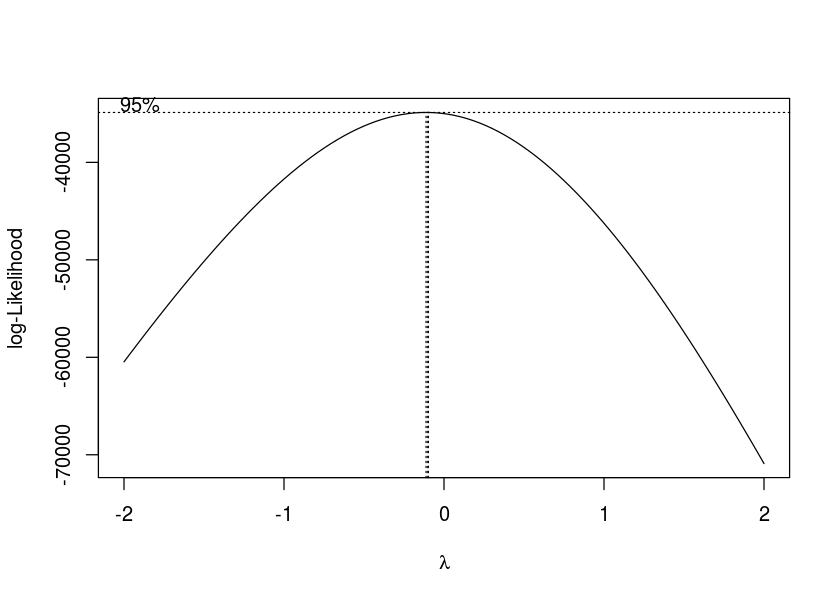

In [22]:
require(MASS)
# Shows log transformation is valid
boxcox(lm(price ~  body + year + mileage + engV + engType + registration, data = auto))

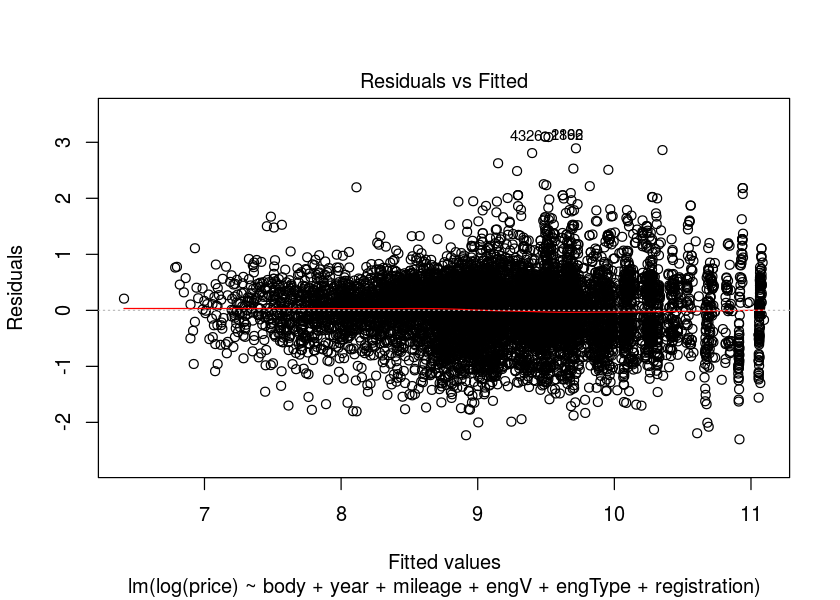

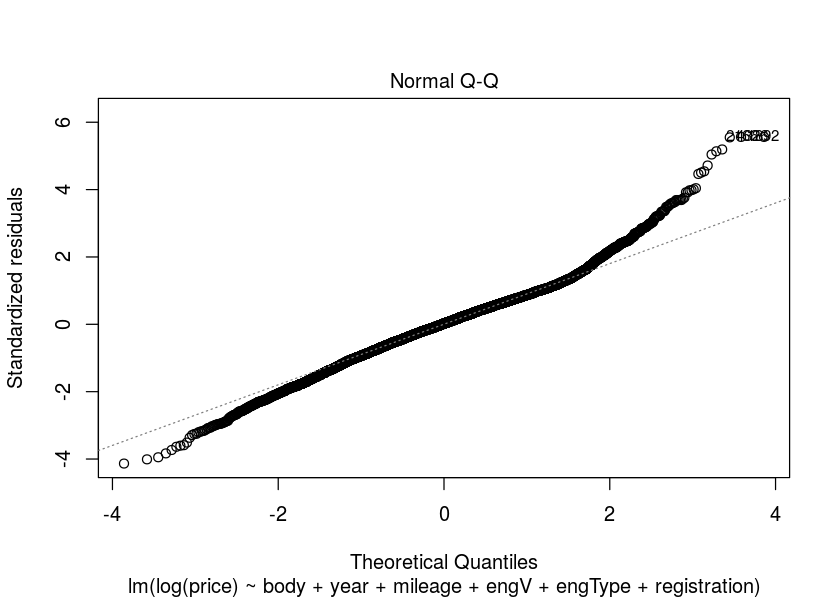

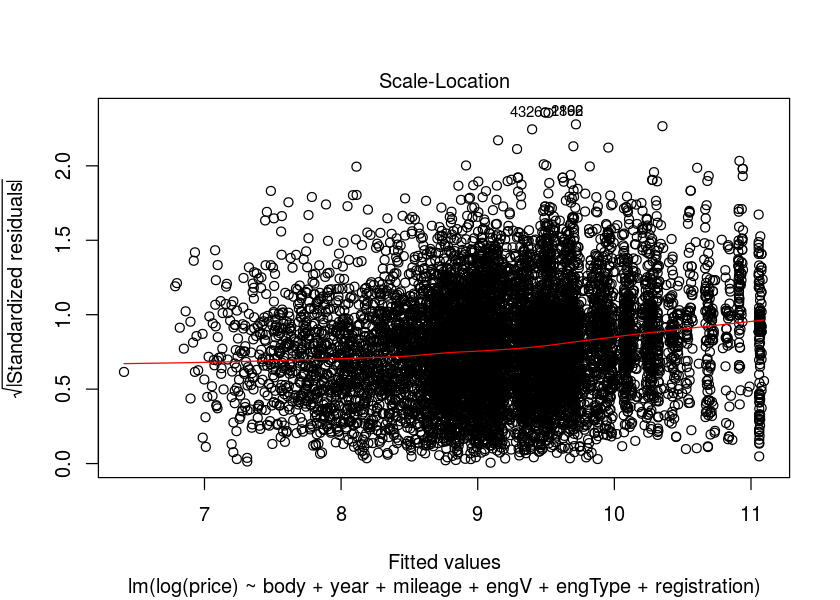

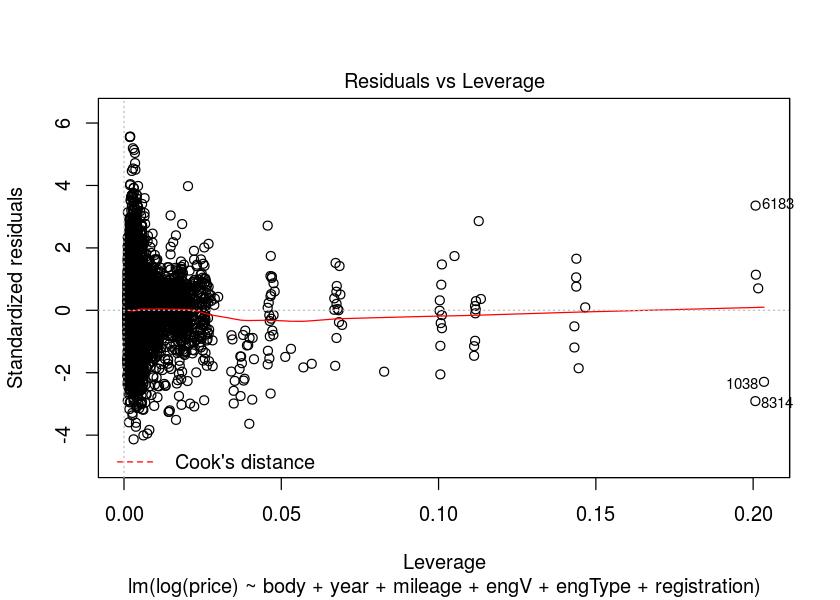

In [23]:
# The plot of model diagnostics
plot(lmod)

In [24]:
# Getting the fitted values
ft <- predict(lmod, type = "response")
print(ft[1:10])

        1         2         3         4         6         7         8         9 
 9.931731  9.428757  9.362114  9.445964 10.283083  8.807186  9.552287  9.426884 
       10        11 
 9.644589 10.906777 


In [25]:
# Return the terms rather than the response
ft <- predict(lmod, type = "terms")
print(ft[1:2,])

         body      year     mileage         engV    engType registration
1  0.53024235 0.3663485 -0.04537668 -0.000769457 -0.1504973   0.04224682
2 -0.06233883 0.3960410  0.01931899 -0.005550065 -0.1504973   0.04224682


In [26]:
# New data to be predicted
nd <- data.frame(body = factor("sedan", levels = c("crossover", "hatch", "other", "sedan", "vagon", "van")),
                               year = factor(2016, levels = as.character(1980:2016)), mileage = 60, engV = 2.0,
                               engType = factor("Gas", levels = as.character(c("Diesel", "Gas", "Other", "Petrol"))),
                               registration = factor("yes", levels = c("no", "yes")))
print(predict(lmod, newdata = nd, type = "response"))

       1 
10.23149 


## K-means clustering

Clustering algorithms are an example of unsupervised learning. There is no target variables as such but algorithms are used to draw inferences from the dataset. The purpose of the clustering algorithm is to group similar items to each other and from those in other groups.

K-means uses distances from points to group them to a predefined number of groups. The K-means is an iterative algorithms that first randomly initialize centers of the groups then repeat the following two steps:

1. For all points, the algorithm assigns each point to a center that minimizes the distance from the point.
2. Re-calculate the centroid of all the centers from the points in their group.

then repeat until the points assignments do not change.

In this example, we use K-means to group the measurements of the `iris` datasets from the columns `"Sepal.Length"`, `"Sepal.Width"`, `"Petal.Length"`, `"Petal.Width"`. Then we compare it to the Species column.

In [27]:
ir <- iris
set.seed(1)
output <- kmeans(ir[,1:4], centers = 3, algorithm = "Hartigan-Wong", iter.max = 30)
print(output$cluster)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3


In [28]:
ir$pred <- as.character(output$cluster)
ir$pred[ir$pred == 1] <- "setosa"
ir$pred[ir$pred == 3] <- "versicolor"
ir$pred[ir$pred == 2] <- "virginica"

In [29]:
# Proportion accuracy for predicting Species from kmeans - an unsupervied learning algorithm
print(round(mean(ir$Species == ir$pred), 3))

[1] 0.893


In [30]:
print(head(iris))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [31]:
output

K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     6.850000    3.073684     5.742105    2.071053
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.15100 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

**Analyse the number of groups chosen using the variance explained chart**

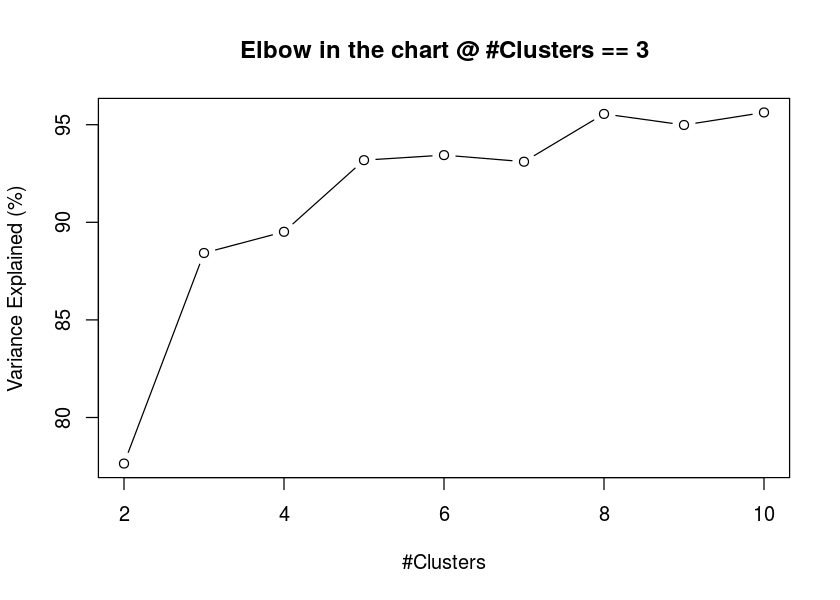

In [32]:
var_explained <- 100*vapply(2:10, function(x){
    x <- kmeans(ir[,1:4], centers = x, algorithm = "Hartigan-Wong", iter.max = 30)
    with(x, betweenss/totss)
}, 0)
plot(var_explained ~ c(2:10), t = "b", ylab = "Variance Explained (%)", xlab = "#Clusters",
    main = "Elbow in the chart @ #Clusters == 3")

# Classification



## Naive Bayes

The Naive Bayes algorithm assumes conditional independence of the target variable given a specific explanatory variables. This simplifying assumption is very powerful, it allows very large datasets to be analysed simply but it is surprisingly effective.



In [33]:
require(e1071)

Loading required package: e1071


In [34]:
shrooms <- read.csv("../data/mushroom/mushrooms.csv")
print(shrooms[1:2,])

  class cap.shape cap.surface cap.color bruises odor gill.attachment
1     p         x           s         n       t    p               f
2     e         x           s         y       t    a               f
  gill.spacing gill.size gill.color stalk.shape stalk.root
1            c         n          k           e          e
2            c         b          k           e          c
  stalk.surface.above.ring stalk.surface.below.ring stalk.color.above.ring
1                        s                        s                      w
2                        s                        s                      w
  stalk.color.below.ring veil.type veil.color ring.number ring.type
1                      w         p          w           o         p
2                      w         p          w           o         p
  spore.print.color population habitat
1                 k          s       u
2                 n          n       g


In [35]:
table(shrooms$class)


   e    p 
4208 3916 

In [36]:
smod <- naiveBayes(class ~ ., data = shrooms)

In [37]:
smod


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        e         p 
0.5179714 0.4820286 

Conditional probabilities:
   cap.shape
Y             b           c           f           k           s           x
  e 0.096007605 0.000000000 0.379277567 0.054182510 0.007604563 0.462927757
  p 0.012257406 0.001021450 0.397344229 0.153217569 0.000000000 0.436159346

   cap.surface
Y            f          g          s          y
  e 0.37072243 0.00000000 0.27186312 0.35741445
  p 0.19407559 0.00102145 0.36057201 0.44433095

   cap.color
Y             b           c           e           g           n           p
  e 0.011406844 0.007604563 0.148288973 0.245247148 0.300380228 0.013307985
  p 0.030643514 0.003064351 0.223697651 0.206332993 0.260469867 0.022471910
   cap.color
Y             r           u           w           y
  e 0.003802281 0.003802281 0.171102662 0.095057034
  p 0.000000000 0.000000000 0.081716

In [38]:
# Accuracy of the model ...
round(mean(predict(smod, newdata = shrooms) == shrooms$class), 2)

[1] 0.94

## Decision Trees

In [39]:
require(rpart)

Loading required package: rpart


In [40]:
tmod <- rpart(class ~ ., data = shrooms)

In [41]:
print(round(mean(predict(tmod, type = "class") == shrooms$class), 2))

[1] 0.99


## Logistic regression

In [42]:
.names <- c("class", "cap.color", "bruises", "odor", "gill.attachment", "gill.spacing", "gill.size",
            "stalk.shape", "stalk.root", "stalk.surface.below.ring", "stalk.color.above.ring",
            "stalk.color.below.ring", "population", "habitat")
dat <- shrooms[, .names]
logmod <- glm(class ~ ., data = dat, family = quasibinomial(link = "logit"))
summary(logmod)

Warning message:
“glm.fit: algorithm did not converge”


Call:
glm(formula = class ~ ., family = quasibinomial(link = "logit"), 
    data = dat)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.081e-05  -1.926e-06  -2.110e-08   5.851e-07   2.510e-05  

Coefficients: (3 not defined because of singularities)
                            Estimate Std. Error  t value Pr(>|t|)    
(Intercept)               -7.777e+01  7.461e-01 -104.231  < 2e-16 ***
cap.colorc                -4.243e+00  1.889e-01  -22.458  < 2e-16 ***
cap.colore                -1.950e+00  1.069e-01  -18.243  < 2e-16 ***
cap.colorg                -1.084e+00  9.062e-02  -11.962  < 2e-16 ***
cap.colorn                -2.117e+00  9.570e-02  -22.122  < 2e-16 ***
cap.colorp                -1.221e+00  8.358e-02  -14.604  < 2e-16 ***
cap.colorr                 1.271e+00  4.841e-01    2.625 0.008675 ** 
cap.coloru                 1.271e+00  4.841e-01    2.625 0.008675 ** 
cap.colorw                -4.971e-01  9.003e-02   -5.521 3.47e-08 ***
cap.colory 

In [43]:
# Fitted model accuracy
print(mean( (predict(logmod, type = "response") >= 0.5) == (dat$class == "p") ))

[1] 1


## Test and train data sets

In [44]:
# Sampling training dataset
set.seed(0)
train_rows <- sample(nrow(dat), 3*(nrow(dat) %/% 4))

In [45]:
train_model <- glm(class ~ ., data = dat[train_rows,], family = quasibinomial(link = "logit"))

Warning message:
“glm.fit: algorithm did not converge”

In [46]:
mod <- predict(train_model, newdata = dat[-train_rows,], type = "response")
print(mean((mod > 0.5) == (dat[-train_rows, "class"] == "p")))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] 1


In [47]:
print(table(dat[-train_rows, "class"]))


   e    p 
1009 1022 


In [48]:
(mod > 0.5) -> pred
(dat[-train_rows, "class"] == "p") -> act

## Accuracy of binary classifier

Below are various measurements for quantifying the accuracy of a binary classifier.

Basic quantities:

Condition Positive (P)<br\>
Condition Negative (N)

True positive (TP)<br\>
True negative (TN)<br\>
False positive (FP): Type 1 error<br\>
False negative (FN): Type 2 error<br\>

In [49]:
# The number of true positives
tp <- function(actual, predicted)
{
    sum((actual == 1) & (predicted == 1))
}

In [50]:
print(tp(act, pred))

[1] 1022


In [51]:
# Number of true negatives
tn <- function(actual, predicted)
{
    sum((actual == 0) & (predicted == 0))
}

In [52]:
print(tn(act, pred))

[1] 1009


In [53]:
# The number of false positives
fp <- function(actual, predicted)
{
    sum((actual == 0) & (predicted == 1))
}

In [54]:
print(fp(act, pred))

[1] 0


In [55]:
# The number of false negatives
fn <- function(actual, predicted)
{
    sum((actual == 1) & (predicted == 0))
}

In [56]:
print(fn(act, pred))

[1] 0


Sensitivity, recall, hit rate, or true positive rate (TPR)<br\>
$TPR = \frac{TP}{P} = \frac{TP}{TP + FN}$

In [57]:
# True positive rate, takes in actual and predicted
tpr <- function(...)
{
    .tp <- tp(...); .fn <- fn(...)
    .tp/(.tp + .fn)
}

Fall-out or false positive rate (FPR)<br\>
$FPR = \frac{FP}{N} = \frac{FP}{FP + TN} = 1 - TNR$

In [58]:
fpr <- function(...)
{
    1 - tpr(...)
}

In [59]:
print(fpr(act, pred))

[1] 0


In [60]:
print(tpr(act, pred))

[1] 1


Precision or positive predictive value (PPV)<br\>
$PPV = \frac{TP}{TP + FP}$

In [61]:
ppv <- function(...)
{
    .tp <- tp(...); .fp <- fp(...)
    .tp/(.tp + .fp)
}

In [62]:
print(ppv(act, pred))

[1] 1


Specificity or true negative rate (TNR)<br\>
$TNR = \frac{TN}{N} = \frac{TN}{TN + FP}$

In [63]:
# True negative rate
tnr <- function(...)
{
    .tn <- tn(...); .fp <- fp(...)
    .tn/(.tn + .fp)
}

In [64]:
print(tnr(act, pred))

[1] 1


Negative predictive value (NPV)<br\>
$NPV = \frac{TN}{TN + FN}$

In [65]:
# Negative predictive value
npv <- function(...)
{
    .tn <- tn(...); .fn <- fn(...)
    .tn/(.tn + .fn)
}

In [66]:
print(npv(act, pred))

[1] 1


False omission rate (FOR)<br\>
$FOR = \frac{FN}{FN + TN} = 1 - NPV$

In [67]:
# False omission rate
foR <- function(...)
{
    1 - npv(...)
}

In [68]:
print(foR(act, pred))

[1] 0


Miss rate or false negative rate (FNR)<br\>
$FNR = \frac{FN}{P} = \frac{FN}{FP + TN} = 1 - TPR$

In [69]:
# False Negative Rate
fnr <- function(...)
{
    1 - tnr(...)
}

In [70]:
print(fnr(act, pred))

[1] 0


False discovery rate (FDR)<br\>
$FDR = \frac{FP}{FP + TP} = 1 - PPV$

In [71]:
# False discovery rate
fdr <- function(...)
{
    1 - ppv(...)
}

In [72]:
print(fdr(act, pred))

[1] 0


Accuracy (ACC)<br\>
$ACC = \frac{TP + TN}{P + N} = \frac{TP + TN}{TP + TN + FP + FN}$

In [73]:
# Accuracy
accuracy <- function(...)
{
    x <- list(...)
    (tp(...) + tn(...))/(length(x[[1]]))
}

In [74]:
print(accuracy(act, pred))

[1] 1


F1 Score<br\>
$F_1 = 2\frac{PPV*TPR}{PPV + TPR} = \frac{2TP}{2TP + FP + FN}$

In [75]:
f1 <- function(...)
{
    .tp <- tp(...)
    2*.tp/(2*.tp + fp(...) + fn(...))
}

In [76]:
print(f1(act, pred))

[1] 1


## Word clouds

Loading required package: wordcloud
Loading required package: RColorBrewer
Loading required package: tm
Loading required package: NLP


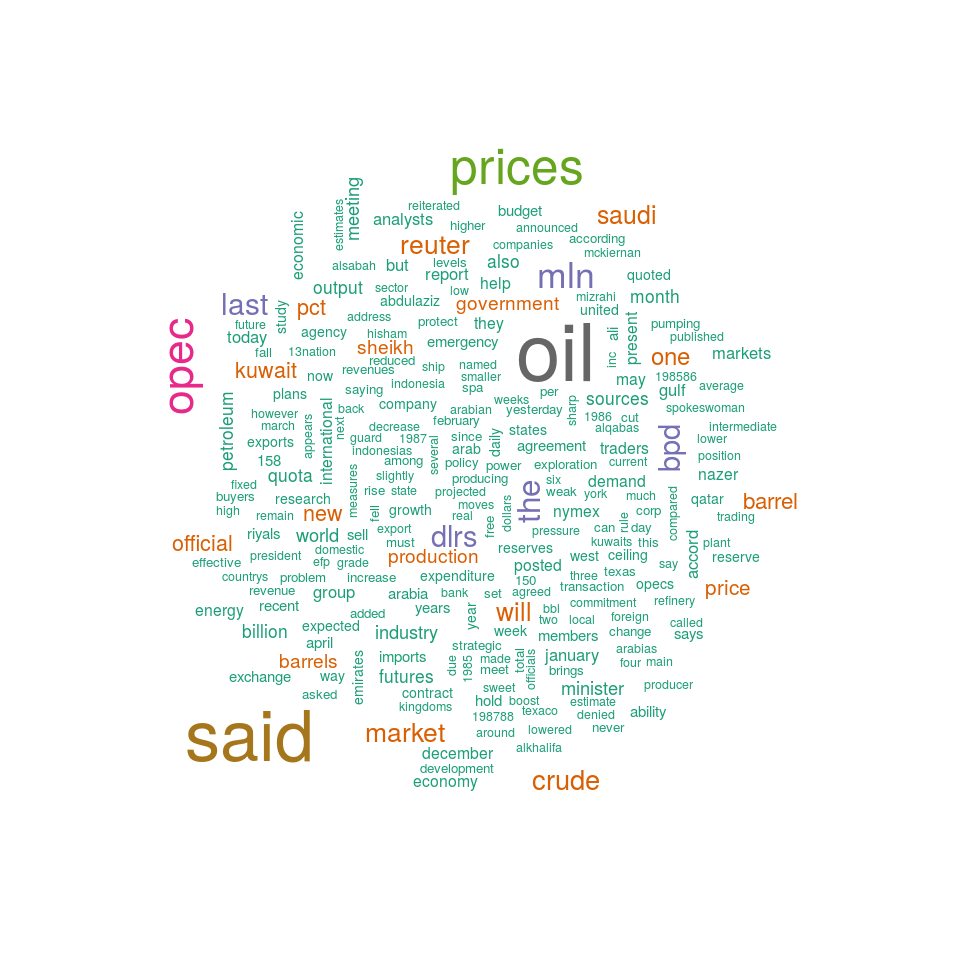

In [77]:
options(repr.plot.width = 8, repr.plot.height = 8)
require(wordcloud)
require(tm)
data(crude)
crude <- tm_map(crude, removePunctuation)
crude <- tm_map(crude, function(x)removeWords(x,stopwords()))
wordcloud(crude, colors=brewer.pal(8, "Dark2"))